<a href="https://colab.research.google.com/github/pcsilcan/dm/blob/master/20202/dm_20202_101_eclat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando fim
Si `pip install fim` no funciona, intente lo sugerido en https://borgelt.net/pyfim.html

A continuación el código para instalar en gogle colab.

In [1]:
%%script bash
curl -O https://borgelt.net/bin/py3/fim.so
sudo ln -sf "$(pwd)/fim.so" /usr/local/lib/python3.6/dist-packages/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  756k  100  756k    0     0   265k      0  0:00:02  0:00:02 --:--:--  265k
ln: failed to create symbolic link '/usr/local/lib/python3.6/dist-packages/fim.so': File exists


In [2]:
from fim import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [3]:
help(eclat)

Help on built-in function eclat in module fim:

eclat(...)
    eclat (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
           eval='x', agg='x', thresh=10, prune=None, algo='a', mode='',
           border=None)
    Find frequent item sets with the Eclat algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an item set     

In [4]:
def loadDataset(filename):
    with open(filename, 'r') as file:
        dataset = []
        #dataset1 = []
        for x in file:
            if "#" not in x:
                items = x.split()
                dataset.append([int(j) for j in items[1:]])
                # if items[0] == '1':
                #   dataset1.append([int(j) for j in items[1:]])

    return dataset #, dataset1

In [5]:
repo = "https://raw.githubusercontent.com/pcsilcan/dm/master/20202/data/"
filename = "zoo.bin"

In [6]:
!curl -O "$repo$filename"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5017  100  5017    0     0  74880      0 --:--:-- --:--:-- --:--:-- 74880


In [7]:
d = loadDataset(filename)

# All Patterns

In [8]:
def allPatterns(d, minsupp):
    s = eclat(d, target='a', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ["Patterns", "Freq"]
        return df, True
    return _, False

In [9]:
def plotAllPatterns(filename):
    numberdata = []
    d = loadDataset(filename)
    k = len(d) // 20
    for i in range(k, len(d), k):
        start = time.time()
        t, r = allPatterns(d, i)
        end = time.time()
        if r:
            numberdata.append((i, t.shape[0], end - start))
    df = pd.DataFrame(numberdata)
    df.columns = ["Threshold", "AllItemsets", "TimeAllItemsets"]
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x="Threshold", y="AllItemsets", ax=ax[0], data=df)
    sns.lineplot(x="Threshold", y="TimeAllItemsets", ax=ax[1], data=df)
    fig.show()

    return df

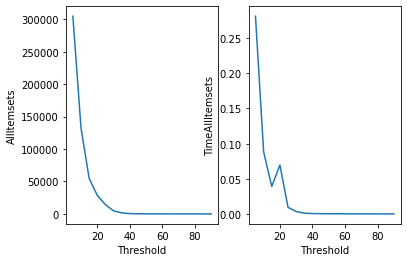

In [10]:
dfAFI = plotAllPatterns(filename)

# Closed Patterns

In [11]:
def closedPatterns(d, minsupp):
    s = eclat(d, target='c', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ["Pattern", "Freq"]
        return df, True
    return _, False

In [12]:
def plotClosedPatterns(filename):
    numberdata = []
    d = loadDataset(filename)
    k = len(d) // 20
    for i in range(k, len(d), k):
        start = time.time()
        t, r = closedPatterns(d, i)
        end = time.time()
        if r:
            numberdata.append((i, t.shape[0], end - start))
    df = pd.DataFrame(numberdata)
    df.columns = ["Threshold", "ClosedItemsets", "TimeClosedItemsets"]
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x="Threshold", y="ClosedItemsets", ax=ax[0], data=df)
    sns.lineplot(x="Threshold", y="TimeClosedItemsets", ax=ax[1], data=df)
    fig.show()

    return df

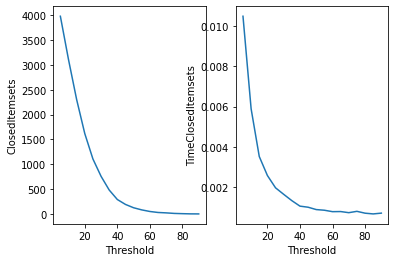

In [13]:
dfCFI = plotClosedPatterns(filename)

# Maximal Itemsets

In [14]:
def maximalPatterns(d, minsupp):
    s = eclat(d, target='m', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ["Pattern", "Freq"]
        return df, True
    return _, False

In [15]:
def plotMaximalPatterns(filename):
    numberdata = []
    d = loadDataset(filename)
    k = len(d) // 20
    for i in range(k, len(d), k):
        start = time.time()
        t, r = maximalPatterns(d, i)
        end = time.time()
        if r:
            numberdata.append((i, t.shape[0], end - start))
    df = pd.DataFrame(numberdata)
    df.columns = ["Threshold", "MaximalItemsets", "TimeMaximalItemsets"]
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x="Threshold", y="MaximalItemsets", ax=ax[0], data=df)
    sns.lineplot(x="Threshold", y="TimeMaximalItemsets", ax=ax[1], data=df)
    fig.show()

    return df

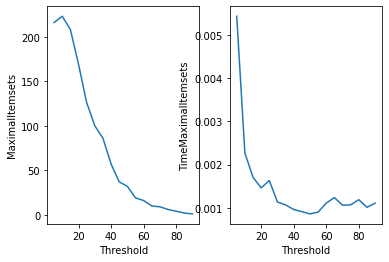

In [16]:
dfMFI = plotMaximalPatterns(filename)

# Comparison

In [17]:
dx = dfAFI.join(dfCFI.set_index("Threshold"), on='Threshold')
dx =    dx.join(dfMFI.set_index("Threshold"), on='Threshold')
dx

,Threshold,AllItemsets,TimeAllItemsets,ClosedItemsets,TimeClosedItemsets,MaximalItemsets,TimeMaximalItemsets
0,5,304723,0.280474,3980,0.010487,216,0.005433
1,10,132253,0.088539,3108,0.005892,223,0.002267
2,15,54888,0.039417,2303,0.003526,208,0.001704
3,20,28589,0.069813,1618,0.002583,169,0.001459
4,25,14305,0.009912,1107,0.001972,126,0.001631
5,30,4710,0.003987,758,0.001649,100,0.001131
6,35,1600,0.001644,482,0.001336,86,0.001065
7,40,488,0.001126,291,0.001063,57,0.000959
8,45,288,0.000936,192,0.001009,37,0.000910
9,50,168,0.000838,125,0.000892,32,0.000857


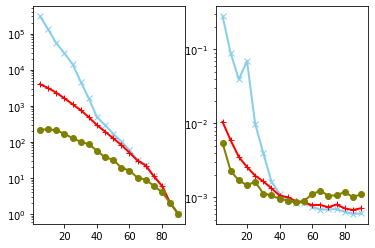

In [23]:
fig, ax = plt.subplots(1, 2)

ax[0].semilogy('Threshold', 'AllItemsets', data=dx, marker="x",
               color='skyblue', linewidth=2)
ax[0].plot('Threshold', 'ClosedItemsets', data=dx, marker="+",
            color='red',  linewidth=2)
ax[0].plot('Threshold', 'MaximalItemsets', data=dx, marker="o",
            color='olive',  linewidth=2)


ax[1].semilogy('Threshold', 'TimeAllItemsets', data=dx, marker="x",
               color='skyblue', linewidth=2)
ax[1].plot('Threshold', 'TimeClosedItemsets', data=dx, marker="+",
            color='red',  linewidth=2)
ax[1].plot('Threshold', 'TimeMaximalItemsets', data=dx, marker="o",
            color='olive',  linewidth=2)

fig.show()